# Example 1: Use of Oh04

## 1. Requirements

- Installation of SenSE

## 2. Oh04 for different incidence angles

First of all, we need to import several packages

In [1]:
# import packages
#-----------------
import numpy as np
import matplotlib.pyplot as plt
from sense.surface import Oh04
from sense.util import f2lam

The RT model output is backscatter in linear units. For visualization purposes the backscatter is usually displayed in decibel (dB). Thus the following helper function is defined  

In [2]:
# Helper function
#------------------
def db(x):
    return 10.*np.log10(x)

Further, we need to define surface model input parameters

In [3]:
# Input data for RT surface model Oh04
#--------------------------------------
f  = 5.3 # Frequency [GHz]
lam = f2lam(f)  # wavelength [m]
k = 2.*np.pi/lam # radar wave number
mv = np.linspace(0.01,0.4) # soil moisture [m³/m³]
theta = np.deg2rad(40) # incidence angle [radians]
s = 0.3/100. # surface roughness [m]
ks = k * s 

With the set input parameters we can now run the model and plot the backscatter output for different soil moisture 

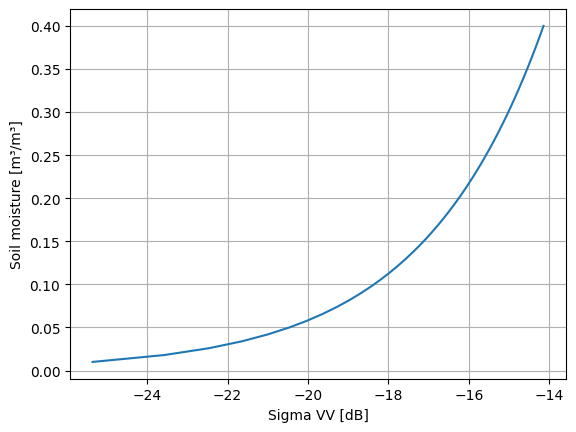

In [4]:
# run the model
Oh = Oh04(mv, ks, theta)

# plot the backscatter
plt.plot(db(Oh.vv), mv)
plt.xlabel('Sigma VV [dB]')
plt.ylabel('Soil moisture [m³/m³]')
plt.grid()

Lets see how the backscatter changes for different surface roughness situations

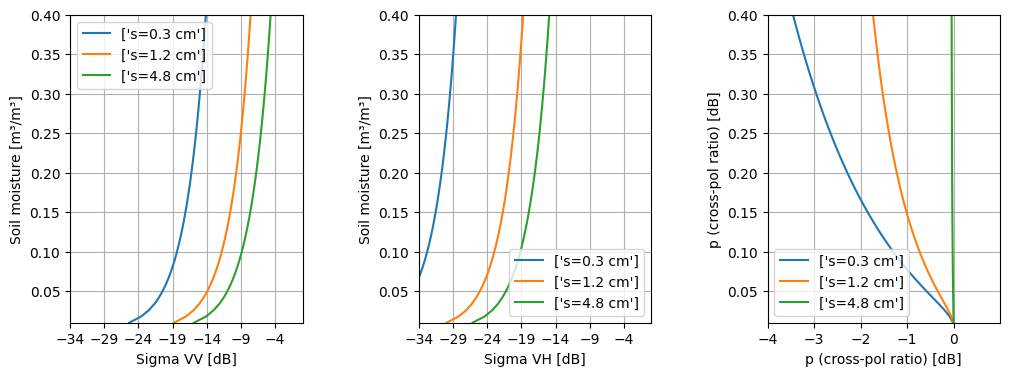

In [5]:
# Function + Plotting
#----------------------
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

s = 0.3/100.
ks = k * s
Oh = Oh04(mv, ks, theta)
ax1.plot(db(Oh.vv), mv, label=['s=0.3 cm'])
ax2.plot(db(Oh.hv), mv, label=['s=0.3 cm'])
ax3.plot(db(Oh.p), mv, label=['s=0.3 cm'])
s = 1.2/100.
ks = k * s
Oh = Oh04(mv, ks, theta)
ax1.plot(db(Oh.vv), mv, label=['s=1.2 cm'])
ax2.plot(db(Oh.hv), mv, label=['s=1.2 cm'])
ax3.plot(db(Oh.p), mv, label=['s=1.2 cm'])
s = 4.8/100.
ks = k * s
Oh = Oh04(mv, ks, theta)
ax1.plot(db(Oh.vv), mv, label=['s=4.8 cm'])
ax2.plot(db(Oh.hv), mv, label=['s=4.8 cm'])
ax3.plot(db(Oh.p), mv, label=['s=4.8 cm'])

ax1.grid()
ax1.set_xlim(-34.,-0.)
ax1.set_ylim(0.01,0.4)
ax1.set_xticks(np.arange(-34, -0, 5))
ax2.grid()
ax2.set_xlim(-34.,-0.)
ax2.set_ylim(0.01,0.4)
ax2.set_xticks(np.arange(-34, -0, 5))
ax3.grid()
ax3.set_xlim(-4.,1.)
ax3.set_ylim(0.01,0.4)
ax3.set_xticks(np.arange(-4, 1, 1))

ax1.set_xlabel('Sigma VV [dB]')
ax2.set_xlabel('Sigma VH [dB]')
ax3.set_xlabel('p (cross-pol ratio) [dB]')

ax1.set_ylabel('Soil moisture [m³/m³]')
ax2.set_ylabel('Soil moisture [m³/m³]')
ax3.set_ylabel('p (cross-pol ratio) [dB]')
ax1.legend()
ax2.legend()
ax3.legend()

# Adjust spacing
plt.subplots_adjust(wspace=0.5)  # Adjust the width space

plt.show()
